ID	Name

_

19015357 احمد محمود السعيد جاب الله


19015894	عبدالرحمن السيد جاد السيد

## Data load and libraries import

In [56]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics.pairwise import rbf_kernel
from scipy.sparse.csgraph import laplacian
from math import*
from sklearn.model_selection import train_test_split

In [57]:
def readFile(fileName) :
    data = pd.read_csv(fileName, header=None)
    data.rename(columns = {41:'label'}, inplace = True)
    return data

In [58]:
training_data = readFile("kddcup.data_10_percent_corrected")
test_data = readFile("corrected.txt")


In [59]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,label
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311024,0,udp,private,SF,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.
311025,0,udp,private,SF,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.
311026,0,udp,private,SF,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.
311027,0,udp,private,SF,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.


The catigorical data is columns 1, 2, 3, label

In [60]:
columns = [1, 2, 3, "label"]
les = []
for c in columns:
    print("changing column ", c)
    le = preprocessing.LabelEncoder()
    le.fit(np.concatenate((training_data[c],test_data[c])))
    print(); print(list(le.classes_))
    print(len(le.classes_), " catigories")
    les.append(le)
    training_data[c] = le.transform(training_data[c])
    print()


changing column  1

['icmp', 'tcp', 'udp']
3  catigories

changing column  2

['IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'hostnames', 'http', 'http_443', 'icmp', 'imap4', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois']
67  catigories

changing column  3

['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH']
11  catigories

changing column  label

['apache2.', 'back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.', 'httptunnel.', 'imap.', 'ipsweep.', 'land.', 'loadm

In [61]:
training_data

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,label
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,16
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,16
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,16
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,16
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,22,9,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,16
494017,0,1,22,9,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,16
494018,0,1,22,9,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,16
494019,0,1,22,9,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,16


In [62]:
print(np.array(les[3].classes_))

['apache2.' 'back.' 'buffer_overflow.' 'ftp_write.' 'guess_passwd.'
 'httptunnel.' 'imap.' 'ipsweep.' 'land.' 'loadmodule.' 'mailbomb.'
 'mscan.' 'multihop.' 'named.' 'neptune.' 'nmap.' 'normal.' 'perl.' 'phf.'
 'pod.' 'portsweep.' 'processtable.' 'ps.' 'rootkit.' 'saint.' 'satan.'
 'sendmail.' 'smurf.' 'snmpgetattack.' 'snmpguess.' 'spy.' 'sqlattack.'
 'teardrop.' 'udpstorm.' 'warezclient.' 'warezmaster.' 'worm.' 'xlock.'
 'xsnoop.' 'xterm.']


## Kmeans

In [63]:
np.random.seed(42)

In [64]:
def KMeans(D, k, ep = 0.01 , T=300):
    mu_t = D[np.random.choice(D.shape[0], k, replace=False)]
    labels = np.zeros(D.shape[0])
    for i in range(T):

        labels = np.argmin( ( (D[:, :, None] - mu_t.T[None, :, :])**2 ).sum(axis=1), axis=1)

        mu_t2 = np.zeros(mu_t.shape)
        for j in range(k):
            Dj = D[labels == j]
            if len(Dj) != 0:
                mu_t2[j] = np.array([Dj.mean(axis=0)])
            else:
                mu_t2[j] = mu_t[j] 
        
        e = ((mu_t - mu_t2)**2).sum()
        print("__________ t = ", i, "__________ ")
        print("e = " , e)

        if e < ep :
            break
        
        mu_t = mu_t2

    return mu_t, labels

In [65]:
#all, X_train, ally, y_train = train_test_split(training_data.drop(["label"],axis=1),training_data["label"].to_numpy() , test_size=0.1, stratify=training_data["label"])

In [66]:
y_training = training_data["label"].to_numpy()


In [67]:
centroidsK7, labelsK7 = KMeans(training_data.drop(["label"],axis=1).to_numpy(), 7)

__________ t =  0 __________ 
e =  175999918.31257606
__________ t =  1 __________ 
e =  70725686440.34108
__________ t =  2 __________ 
e =  82576904526033.0
__________ t =  3 __________ 
e =  52714221733158.32
__________ t =  4 __________ 
e =  4.5801983591847526e+17
__________ t =  5 __________ 
e =  9812701233462.87
__________ t =  6 __________ 
e =  2350426722782.16
__________ t =  7 __________ 
e =  440199569855.09735
__________ t =  8 __________ 
e =  508227950.7732403
__________ t =  9 __________ 
e =  1200089833.8218322
__________ t =  10 __________ 
e =  9623887411.218388
__________ t =  11 __________ 
e =  56987901609.5541
__________ t =  12 __________ 
e =  100159051485.948
__________ t =  13 __________ 
e =  157924985346.99734
__________ t =  14 __________ 
e =  44291815900.72878
__________ t =  15 __________ 
e =  10954065742.797783
__________ t =  16 __________ 
e =  10012149050.204994
__________ t =  17 __________ 
e =  2248990171.9285927
__________ t =  18 __________ 


In [68]:
centroidsK15, labelsK15 = KMeans(training_data.drop(["label"],axis=1).to_numpy(), 15)

__________ t =  0 __________ 
e =  1095662203.500639
__________ t =  1 __________ 
e =  192697412796.84268
__________ t =  2 __________ 
e =  110546235741779.48
__________ t =  3 __________ 
e =  4.656600611895519e+17
__________ t =  4 __________ 
e =  7207364930791.68
__________ t =  5 __________ 
e =  4552400615985.755
__________ t =  6 __________ 
e =  984333051391.2587
__________ t =  7 __________ 
e =  97268328026.44852
__________ t =  8 __________ 
e =  2712292930.2756042
__________ t =  9 __________ 
e =  27159585437.215134
__________ t =  10 __________ 
e =  70994800673.20683
__________ t =  11 __________ 
e =  187127542704.70325
__________ t =  12 __________ 
e =  92645730203.29927
__________ t =  13 __________ 
e =  30254771317.740147
__________ t =  14 __________ 
e =  14186451713.4906
__________ t =  15 __________ 
e =  5550296268.87306
__________ t =  16 __________ 
e =  2133665892.630883
__________ t =  17 __________ 
e =  6382518448.017077
__________ t =  18 __________ 


In [69]:
centroidsK23, labelsK23 = KMeans(training_data.drop(["label"],axis=1).to_numpy(), 23)

__________ t =  0 __________ 
e =  149707724285.78854
__________ t =  1 __________ 
e =  111873124839545.47
__________ t =  2 __________ 
e =  4.656598068991551e+17
__________ t =  3 __________ 
e =  9156741420905.873
__________ t =  4 __________ 
e =  3174536620260.8223
__________ t =  5 __________ 
e =  905767712891.7434
__________ t =  6 __________ 
e =  636230630528.2869
__________ t =  7 __________ 
e =  47553343678.79501
__________ t =  8 __________ 
e =  29141391337.03457
__________ t =  9 __________ 
e =  69584654610.22339
__________ t =  10 __________ 
e =  226194424244.8554
__________ t =  11 __________ 
e =  72773616464.54596
__________ t =  12 __________ 
e =  27121539033.853256
__________ t =  13 __________ 
e =  15467689054.623646
__________ t =  14 __________ 
e =  6391737333.204267
__________ t =  15 __________ 
e =  3714533696.7010837
__________ t =  16 __________ 
e =  9631972917.577547
__________ t =  17 __________ 
e =  10714329524.245323
__________ t =  18 ________

In [70]:
centroidsK31, labelsK31 = KMeans(training_data.drop(["label"],axis=1).to_numpy(), 31)

__________ t =  0 __________ 
e =  1685517419.6847408
__________ t =  1 __________ 
e =  111747628628.93799
__________ t =  2 __________ 
e =  83096084456799.84
__________ t =  3 __________ 
e =  54413900071781.35
__________ t =  4 __________ 
e =  4.580195380187031e+17
__________ t =  5 __________ 
e =  9123169614047.104
__________ t =  6 __________ 
e =  1419066849362.8784
__________ t =  7 __________ 
e =  11530827376.056528
__________ t =  8 __________ 
e =  61983082173.587296
__________ t =  9 __________ 
e =  107513945272.26328
__________ t =  10 __________ 
e =  159705581853.54398
__________ t =  11 __________ 
e =  49184610176.936714
__________ t =  12 __________ 
e =  8246043192.379521
__________ t =  13 __________ 
e =  11238719328.83457
__________ t =  14 __________ 
e =  6708363024.165414
__________ t =  15 __________ 
e =  4821570680.514675
__________ t =  16 __________ 
e =  8811337088.939304
__________ t =  17 __________ 
e =  9366600762.08757
__________ t =  18 ________

In [71]:
centroidsK45, labelsK45 = KMeans(training_data.drop(["label"],axis=1).to_numpy(), 45)

__________ t =  0 __________ 
e =  9247353306.927782
__________ t =  1 __________ 
e =  165391892057.69385
__________ t =  2 __________ 
e =  119831296587147.92
__________ t =  3 __________ 
e =  4.650232416313938e+17
__________ t =  4 __________ 
e =  9307532894278.572
__________ t =  5 __________ 
e =  3410282814420.1924
__________ t =  6 __________ 
e =  772945533298.2241
__________ t =  7 __________ 
e =  495899595873.57495
__________ t =  8 __________ 
e =  13162513938.44895
__________ t =  9 __________ 
e =  15143533868.799088
__________ t =  10 __________ 
e =  68048002149.13223
__________ t =  11 __________ 
e =  100572433144.21681
__________ t =  12 __________ 
e =  170857822561.13123
__________ t =  13 __________ 
e =  36646986217.557434
__________ t =  14 __________ 
e =  5412949658.073971
__________ t =  15 __________ 
e =  11270017205.11493
__________ t =  16 __________ 
e =  6897795406.791649
__________ t =  17 __________ 
e =  5308957863.442526
__________ t =  18 _______

In [72]:
centroids_k = [centroidsK7, centroidsK15, centroidsK23, centroidsK31, centroidsK45]
labels_k = [labelsK7, labelsK15, labelsK23, labelsK31, labelsK45]
ks = [7,15,23,31,45]

# Evaluation
Precision
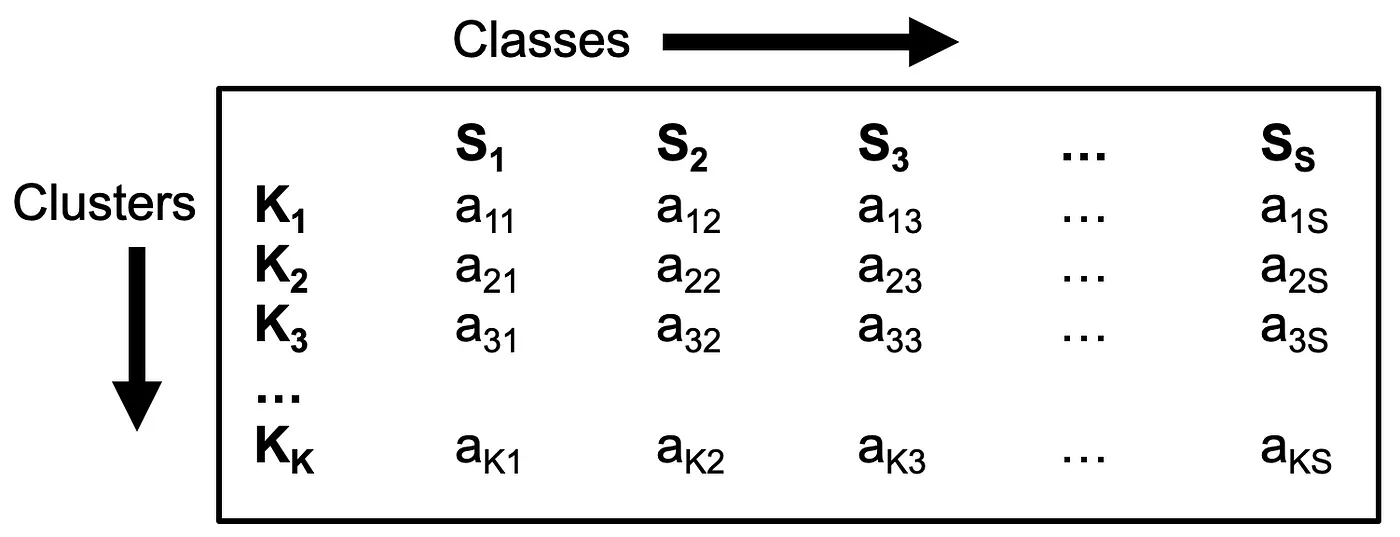

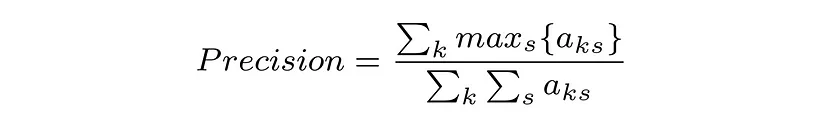

In [73]:
def get_A(labels, y_true):
    labels_uniqe = np.unique(labels)    
    true_uniqe = np.unique(y_true)

    # build A 2D array
    A = np.zeros((len(labels_uniqe), len(true_uniqe)))
    for k in range(len(labels_uniqe)):
        for s in range(len(true_uniqe)):
            A[k,s] = np.sum(np.logical_and(labels == labels_uniqe[k], y_true == true_uniqe[s]))
    
    return A


In [74]:
def precision(labels, y_true, A=None):
    # Tp / (Tp + Fp)

    if A is None:
        A = get_A(labels, y_true)

    k_to_y = np.argmax(A, axis=1)
    Tp = np.zeros(A.shape[0])
    Fp = np.zeros(A.shape[0])
    for k in range(A.shape[0]):
        Tp[k] = A[k, k_to_y[k]]
        Fp[k] = np.sum([A[k,x] for x in range(A.shape[1]) if x != k_to_y[k]])

        
    precision = Tp / (Tp+Fp)
    return precision

In [75]:
def recall(labels, y_true, A=None):
    # Tp / (Tp + Fn)

    if A is None:
        A = get_A(labels, y_true)

    k_to_y = np.argmax(A, axis=1)
    Tp = np.zeros(A.shape[0])
    Fn = np.zeros(A.shape[0])
    for k in range(A.shape[0]):
        Tp[k] = A[k, k_to_y[k]]
        Fn[k] = np.sum([A[x,k_to_y[k]] for x in range(A.shape[0]) if x !=k ])
        
    precision = Tp / (Tp+Fn)
    return precision

In [76]:
def F1(labels, y_true, A=None):
    # 2 * P*R/(P+R)

    if A is None:
        A = get_A(labels, y_true)

    P = precision(labels, y_true, A)
    R = recall(labels, y_true, A)
    F1 = 2 * P*R/(P+R)
    return F1

In [77]:
for j in range(5):
    print("________ k = ", ks[j], "________")

    print("precision")
    print(precision(labels_k[j], y_training))
    print("recall")
    print(recall(labels_k[j], y_training))
    print("F1")
    print(F1(labels_k[j], y_training))


________ k =  7 ________
precision
[1.         0.57131289 0.73170732 0.83333333 0.95238095 0.93507048
 0.96052632]
recall
[9.61538462e-04 1.00000000e+00 5.88235294e-02 7.50000000e-01
 2.05596332e-04 9.93645030e-01 7.50426612e-04]
F1
[1.92122959e-03 7.27179025e-01 1.08892922e-01 7.89473684e-01
 4.11103917e-04 9.63468310e-01 1.49968157e-03]
________ k =  15 ________
precision
[0.73170732 0.86363636 0.95640687 0.81132075 1.         0.9979445
 0.83333333 1.         0.98529412 0.97274276 0.90462144 0.99865817
 0.97172809 0.98507463 0.56529282]
recall
[5.88235294e-02 1.95316516e-04 9.85928280e-01 8.84064228e-04
 1.74756882e-04 9.98170193e-03 7.50000000e-01 9.61538462e-04
 7.57622484e-03 1.17395506e-02 9.45743128e-03 9.18090421e-02
 9.99946579e-01 6.78467896e-04 1.00000000e+00]
F1
[1.08892922e-01 3.90544707e-04 9.70943228e-01 1.76620389e-03
 3.49452695e-04 1.97657021e-02 7.89473684e-01 1.92122959e-03
 1.50368270e-02 2.31991224e-02 1.87191617e-02 1.68158839e-01
 9.85635402e-01 1.35600185e-03 7

# Density-Based Spatial Clustering of Applications with Noise (DBSCAN)


In [78]:
def dbscan(data, eps, min_pts):
    '''
    DBSCAN clustering algorithm
    data: numpy array of data points
    eps: distance threshold
    min_pts: minimum number of points in a cluster
    returns: array of labels 
    '''
    labels = np.zeros(data.shape[0]) # initialize all points as noise
    cluster_id = 0

    # Find core points
    for i in range(data.shape[0]):
        if labels[i] != 0:
            continue
        neighbors = find_neighbors(data, i, eps)
        if len(neighbors) < min_pts:
            labels[i] = -1 # mark as noise
        else:
            cluster_id += 1
            labels[i] = cluster_id
            expand_cluster(data, labels, i, neighbors, cluster_id, eps, min_pts)

    return labels

def find_neighbors(data, i, eps):
    '''
    Find all points in the dataset within a distance eps of point i
    '''
    return [j for j in range(data.shape[0]) if np.linalg.norm(data[i]-data[j]) < eps]

def expand_cluster(data, labels, i, neighbors, cluster_id, eps, min_pts):
    '''
    Recursive function to expand a cluster around a core point
    '''
    for j in neighbors:
        if labels[j] == -1: # skip noise points
            continue
        if labels[j] == 0:
            labels[j] = cluster_id
            new_neighbors = find_neighbors(data, j, eps)
            if len(new_neighbors) >= min_pts:
                neighbors += new_neighbors
        else:
            continue
        
def assign_labels(y_true, y_pred):
    # Create a dictionary to map predicted labels to true labels
    label_map = {}
    for i in range(len(y_pred)):
        label_map[y_pred[i]] = y_true[i]

    # Assign each predicted label a true label
    new_y_pred = []
    for label in y_pred:
        new_y_pred.append(label_map[label])
    return new_y_pred

In [79]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Set the random seed
np.random.seed(42)
# Split the training dataset into 0.5% training and 99.5% test 
X_train, X_test = train_test_split(
    training_data, train_size=0.01, random_state=42, stratify=training_data['label'])
del X_test
true_labels = X_train.values[:,-1]
X_train = X_train.values[:,:-1]
print(X_train)
# apply dbscan on the training data
eps = 15
min_pts = 3
dbscan_labels = dbscan(X_train, eps, min_pts)

n_clusters = 23

kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans_model.fit_predict(X_train)

# Assign the dbscan labels to the true labels
true_labels_dbscan = assign_labels(true_labels, dbscan_labels)
# Assign the kmeans labels to the true labels
true_labels_kmeans = assign_labels(true_labels, kmeans_labels)

# Compute the micro-averaged F1 score for the clustering
score_dbscan = F1(true_labels, true_labels_dbscan)
score_kmeans = F1(true_labels, true_labels_kmeans)
print(f"Micro-averaged F1 score for DBSCAN: {score_dbscan}")
print(f"Micro-averaged F1 score for KMeans: {score_kmeans}")

[[ 0.  0. 14. ...  0.  0.  0.]
 [ 0.  1. 46. ...  1.  0.  0.]
 [ 0.  1. 22. ...  0.  0.  0.]
 ...
 [ 0.  0. 13. ...  0.  0.  0.]
 [ 0.  0. 14. ...  0.  0.  0.]
 [ 0.  0. 14. ...  0.  0.  0.]]


KeyboardInterrupt: 

# Normalized Cut

In [ ]:
X_train, X_test = train_test_split(
    training_data, train_size=0.005, random_state=42, stratify=training_data["label"])
del X_test
y_train = X_train["label"].to_numpy()
X_train = X_train.drop(["label"], axis=1).to_numpy()

In [ ]:
print(X_train.shape)

In [ ]:
def normalized_cut(k):
    # Compute the Similarity matrix
    similarity_matrix = rbf_kernel(X_train)
    np.fill_diagonal(similarity_matrix, 0)

    # Compute the Laplacian matrix
    La = laplacian(similarity_matrix, normed=True)

    # Compute the eigenvectors of the Laplacian matrix
    _, eigenvecs = np.linalg.eigh(La)
    
    # Compute the k-means clustering of the normalized eigenvectors
    _, labels = KMeans(eigenvecs[:, 1:k+1], k)
    return labels

In [ ]:
predicted_labels = normalized_cut(23)
print(predicted_labels)
print(y_train)

# Identify anomalies
# anomalies = np.where(predicted_labels == 1)[0]

# print("Number of detected anomalies: ", len(anomalies))

In [ ]:
#  Evaluate the performance of the normalized cut algorithm
precision = precision(predicted_labels, y_train)